<a href="https://colab.research.google.com/github/junhyuk426/MyFirstRepo/blob/main/%EB%8B%A4%EC%B8%B5_%ED%8D%BC%EC%85%89%ED%8A%B8%EB%A1%A0%EC%9C%BC%EB%A1%9C_MNIST%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install torch
!pip3 install torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [9]:
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [11]:
first = mnist.data.iloc[0]
np.array(first) #or mnist.data.values[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [12]:
mnist.target[0]

'5'

In [13]:
mnist.target = mnist.target.astype(np.int8)

In [24]:
X = mnist.data.values / 255
y = mnist.target.values

In [15]:
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [16]:
y[0]

5

이 이미지 데이터의 레이블은 5이다


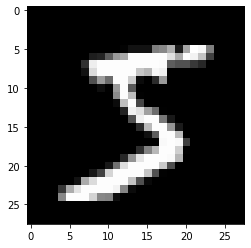

In [19]:
plt.imshow(X[0].reshape(28, 28), cmap='gray')
print("이 이미지 데이터의 레이블은 {:.0f}이다".format(y[0]))

In [22]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=1/7, random_state=0)

X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)

In [26]:
from torch import nn
model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100)) # 100개의 노드에 넣음.
model.add_module('relu1', nn.ReLU()) #활성화 함수 넣어줌. 위 줄까지 fully-connected 하나
model.add_module('fc2', nn.Linear(100, 100)) # 이 전층에서 100개로 넘어오고 다음에도 100개도 이뤄짐
model.add_module('relu2', nn.ReLU()) #똑같이 렐루 써서 활성화
model.add_module('fc3', nn.Linear(100, 10)) # 0부터 9까지 - 결과층
# 샌드위치 쌓듯이 쌓는거임
print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [28]:
from torch import optim

loss_fn = nn.CrossEntropyLoss() #오차함수 선택

optimizer = optim.Adam(model.parameters(), lr=0.01)
# 가중치를 학습하기 위한 최적화 기법 선택

In [29]:
def train(epoch):
  model.train()

  for data, targets in loader_train:

    optimizer.zero_grad()
    outputs = model(data)
    loss = loss_fn(outputs, targets)
    loss.backward()
    optimizer.step()

  print("epch{} : 완료\n".format(epoch))


In [30]:
def test():
  model.eval()
  correct = 0

  with torch.no_grad():
    for data, targets in loader_test:

      outputs = model(data)

      _, predicted = torch.max(outputs.data, 1)
      correct += predicted.eq(targets.data.view_as(predicted)).sum()

      data_num = len(loader_test.dataset)
      print('\n테스트 데이터에서 예측 정확도 : {}/{} ({:.0f}%)\n'.format(correct, data_num, 100. * correct/data_num))

In [31]:
test()


테스트 데이터에서 예측 정확도 : 6/60000 (0%)


테스트 데이터에서 예측 정확도 : 12/60000 (0%)


테스트 데이터에서 예측 정확도 : 15/60000 (0%)


테스트 데이터에서 예측 정확도 : 19/60000 (0%)


테스트 데이터에서 예측 정확도 : 23/60000 (0%)


테스트 데이터에서 예측 정확도 : 26/60000 (0%)


테스트 데이터에서 예측 정확도 : 33/60000 (0%)


테스트 데이터에서 예측 정확도 : 40/60000 (0%)


테스트 데이터에서 예측 정확도 : 43/60000 (0%)


테스트 데이터에서 예측 정확도 : 46/60000 (0%)


테스트 데이터에서 예측 정확도 : 51/60000 (0%)


테스트 데이터에서 예측 정확도 : 55/60000 (0%)


테스트 데이터에서 예측 정확도 : 57/60000 (0%)


테스트 데이터에서 예측 정확도 : 63/60000 (0%)


테스트 데이터에서 예측 정확도 : 68/60000 (0%)


테스트 데이터에서 예측 정확도 : 74/60000 (0%)


테스트 데이터에서 예측 정확도 : 75/60000 (0%)


테스트 데이터에서 예측 정확도 : 84/60000 (0%)


테스트 데이터에서 예측 정확도 : 94/60000 (0%)


테스트 데이터에서 예측 정확도 : 99/60000 (0%)


테스트 데이터에서 예측 정확도 : 104/60000 (0%)


테스트 데이터에서 예측 정확도 : 110/60000 (0%)


테스트 데이터에서 예측 정확도 : 116/60000 (0%)


테스트 데이터에서 예측 정확도 : 119/60000 (0%)


테스트 데이터에서 예측 정확도 : 125/60000 (0%)


테스트 데이터에서 예측 정확도 : 131/60000 (0%)


테스트 데이터에서 예측 정확도 : 139/60000 (0%)


테스트 데이터에서 예측 정확도 : 145/60000 (0%)


테스트 데이터에서 예측

In [33]:
for epoch in range(3) : 
  train(epoch)

test()

epch0 : 완료

epch1 : 완료

epch2 : 완료


테스트 데이터에서 예측 정확도 : 60/60000 (0%)


테스트 데이터에서 예측 정확도 : 121/60000 (0%)


테스트 데이터에서 예측 정확도 : 181/60000 (0%)


테스트 데이터에서 예측 정확도 : 241/60000 (0%)


테스트 데이터에서 예측 정확도 : 303/60000 (1%)


테스트 데이터에서 예측 정확도 : 360/60000 (1%)


테스트 데이터에서 예측 정확도 : 420/60000 (1%)


테스트 데이터에서 예측 정확도 : 480/60000 (1%)


테스트 데이터에서 예측 정확도 : 538/60000 (1%)


테스트 데이터에서 예측 정확도 : 598/60000 (1%)


테스트 데이터에서 예측 정확도 : 654/60000 (1%)


테스트 데이터에서 예측 정확도 : 711/60000 (1%)


테스트 데이터에서 예측 정확도 : 770/60000 (1%)


테스트 데이터에서 예측 정확도 : 833/60000 (1%)


테스트 데이터에서 예측 정확도 : 893/60000 (1%)


테스트 데이터에서 예측 정확도 : 953/60000 (2%)


테스트 데이터에서 예측 정확도 : 1012/60000 (2%)


테스트 데이터에서 예측 정확도 : 1072/60000 (2%)


테스트 데이터에서 예측 정확도 : 1134/60000 (2%)


테스트 데이터에서 예측 정확도 : 1194/60000 (2%)


테스트 데이터에서 예측 정확도 : 1254/60000 (2%)


테스트 데이터에서 예측 정확도 : 1313/60000 (2%)


테스트 데이터에서 예측 정확도 : 1374/60000 (2%)


테스트 데이터에서 예측 정확도 : 1434/60000 (2%)


테스트 데이터에서 예측 정확도 : 1490/60000 (2%)


테스트 데이터에서 예측 정확도 : 1551/60000 (3%)


테스트 데이터에서 예측 정확도 :

예측 결과 : 2
이 이미지 데이터의 정답 레이블은 2입니다.


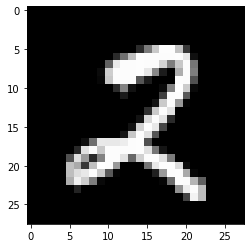

In [36]:
index = 2018

model.eval()
data = X_test[index]
output = model(data)
_, predicted = torch.max(output.data, 0)

print("예측 결과 : {}".format(predicted))

X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28, 28), cmap = 'gray')
print("이 이미지 데이터의 정답 레이블은 {:.0f}입니다.".format(y_test[index]))